---
#**Ecuacion diferencial ordinaria con condicion de frontera**

David Felipe Bambague (dbambague@unal.edu.co)

---

 Vamos a resolver la ecuación difrerncial que da cuenta de las oscilaciones de una viga con extremo fijo y extremo libre.

  \begin{equation*}
      y^{\prime\prime} -4y =0
  \end{equation*}

  Las condiciones de frontera del problema son:

  \begin{equation*}
      y(0)=0\\
      y(1)=5\\
  \end{equation*}

In [84]:
!pip install deepxde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

#Usar doble precisión si la GPU lo soporta. Float32 por defecto.
dde.config.real.set_float64()

##**1. Definir la Ecuación a Resolver**

In [86]:
def ode(x,y):
  dy_dx = dde.grad.jacobian(y,x)
  d2y_dx2 = dde.grad.hessian(y,x)
  return  d2y_dx2 - 4*dy_dx
  

##**2. Definir Dominio de la Ecuación**

In [87]:
geom = dde.geometry.Interval(0, 1)

##**3. Definir Condiciones de Frontera**

In [88]:
def boundary(x, on_boundary):
    return on_boundary

In [89]:
#def func(x):
 # c = 5.0/np.sinh(2)
  #return c*np.sinh(2*x)

In [90]:
bc = dde.icbc.DirichletBC(geom, func, boundary)

##**4. Crear Datos de Entrenamiento**

In [91]:
 data = dde.data.PDE(geom, ode, bc, 16, 2, solution=func, num_test=100)

##**5. Crear la Red Neuronal**

In [92]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

##**6. Compilar y Entrenar el Modelo**

In [93]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)

Compiling model...
Building feed-forward neural network...
'build' took 0.100485 s



/usr/local/lib/python3.7/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:110: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_constraint=self.kernel_constraint,


'compile' took 0.955858 s

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric   
0         [6.90e-01, 1.35e+01]    [6.92e-01, 1.35e+01]    [1.05e+00]    
1000      [1.82e-01, 5.72e+00]    [1.55e-01, 5.72e+00]    [6.12e-01]    
2000      [1.89e-02, 2.34e-04]    [3.26e-02, 2.34e-04]    [3.47e-01]    
3000      [2.64e-03, 7.16e-06]    [6.49e-03, 7.16e-06]    [3.49e-01]    
4000      [9.05e-04, 1.64e-06]    [3.13e-03, 1.64e-06]    [3.49e-01]    
5000      [4.21e-04, 5.94e-07]    [1.85e-03, 5.94e-07]    [3.49e-01]    
6000      [2.21e-04, 2.15e-07]    [1.21e-03, 2.15e-07]    [3.49e-01]    
7000      [1.36e-04, 2.17e-07]    [1.01e-03, 2.17e-07]    [3.49e-01]    
8000      [8.05e-05, 6.74e-08]    [7.19e-04, 6.74e-08]    [3.49e-01]    
9000      [6.31e-05, 9.36e-08]    [6.86e-04, 9.36e-08]    [3.49e-01]    
10000     [5.68e-05, 4.59e-07]    [6.63e-04, 4.59e-07]    [3.49e-01]    

Best model at step 10000:
  train loss: 5.73e-05
  

##**7. Graficar Solucion**

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


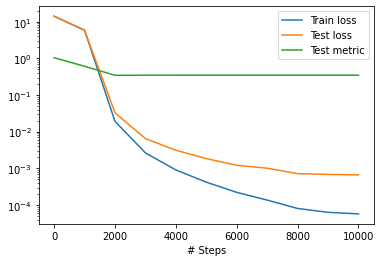

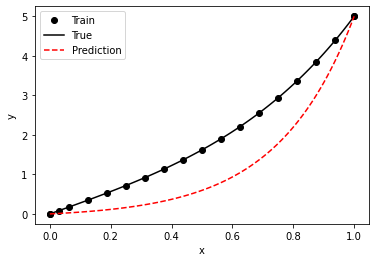

In [94]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)


In [95]:
dde.optimizers.config.set_LBFGS_options(maxiter=1000)
model.compile("L-BFGS-B")
losshistory, train_state = model.train()


Compiling model...
'compile' took 0.579065 s

Training model...

Step      Train loss              Test loss               Test metric
10000     [5.68e-05, 4.59e-07]    [6.63e-04, 4.59e-07]    []  
10616     [1.20e-09, 2.97e-18]    [4.62e-06, 2.97e-18]    []  

Best model at step 10616:
  train loss: 1.20e-09
  test loss: 4.62e-06
  test metric: []

'train' took 34.414227 s



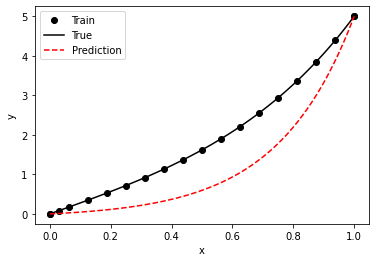

In [96]:
dde.utils.external.plot_best_state(train_state)
